## Trying PySpark for data mining

We need to decide what is the schema of the data and then transform the data to that schema. For that, we will iterate over all the thesis metadata, see if they match the schema, try to format it and if not possible then return a code that tells us which field didn't match the schema.

In [2]:
THESES_FILE = '../data/theseus_clean.jl'

In [3]:
# Resilient Distributed Dataset
rdd = sc.textFile(THESES_FILE)

In [4]:
# Data Frame
df = sqlContext.jsonFile(THESES_FILE)

/opt/spark-1.6.1/python/pyspark/sql/context.py:478: UserWarning: jsonFile is deprecated. Use read.json() instead.
  warnings.warn("jsonFile is deprecated. Use read.json() instead.")


In [5]:
# Print the schema
df.printSchema()

root
 |-- abstract_en: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- abstract_fi: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- abstract_sv: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- authors: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- collections: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- date: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- documents_url: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- identifier: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- keywords: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- language: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- organization: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- orientation: ar

In [6]:
df.count()

99738

## keywords

In [7]:
from operator import add

# Most popular keywords
(df.flatMap(lambda row: row.keywords)
  .map(lambda x: (x, 1))
  .reduceByKey(add)
  .sortBy(lambda x: -1 * x[1])
  .take(10))

[(u'markkinointi', 1252),
 (u'asiakastyytyv\xe4isyys', 1202),
 (u'kehitt\xe4minen', 1158),
 (u'ty\xf6hyvinvointi', 1037),
 (u'varhaiskasvatus', 1036),
 (u'laatu', 986),
 (u'sosiaalinen media', 967),
 (u'nuoret', 948),
 (u'osallisuus', 926),
 (u'markkinointiviestint\xe4', 768)]

## subjects

In [8]:
from operator import add

# Most popular subjects
(df.flatMap(lambda row: row.subjects)
  .map(lambda x: (x, 1))
  .reduceByKey(add)
  .sortBy(lambda x: -1 * x[1])
  .take(10))

[(u'markkinointi', 2421),
 (u'kehitt\xe4minen', 2341),
 (u'lapset', 1774),
 (u'nuoret', 1772),
 (u'laatu', 1625),
 (u'suunnittelu', 1600),
 (u'yritykset', 1474),
 (u'asiakastyytyv\xe4isyys', 1459),
 (u'palvelut', 1360),
 (u'', 1255)]

## language

In [9]:
# Show language count
df.groupBy("language").count().collect()

[Row(language=[u'sv'], count=3651),
 Row(language=[u''], count=7),
 Row(language=[u'fi', u'akuuttihoito'], count=1),
 Row(language=[u'fi', u'swe'], count=1),
 Row(language=[u'en', u'zh'], count=1),
 Row(language=[u'de'], count=6),
 Row(language=[u'en', u''], count=51),
 Row(language=[u'fi', u'en'], count=3),
 Row(language=[u'eng'], count=1),
 Row(language=[u'fi', u''], count=629),
 Row(language=[u'en'], count=9604),
 Row(language=[u'en', u'fi'], count=4),
 Row(language=[u'sv', u'en', u'fi'], count=1),
 Row(language=[u'other'], count=8),
 Row(language=[], count=19),
 Row(language=[u'fi'], count=85715),
 Row(language=[u'fr'], count=12),
 Row(language=[u'fi', u'selkokieli'], count=1),
 Row(language=[u'fi', u'en', u''], count=1),
 Row(language=[u'fi, en'], count=11),
 Row(language=[u'fi', u'et', u''], count=1),
 Row(language=[u'ru'], count=10)]

language schema:
 - format: String
 - values: 'fi', 'en', 'sv', 'ru', 'fr', 'de'
 - rule:

TODO: get a list of official language abbreviations instead of hardcoding them

## year

In [10]:
df.groupBy("year").count().orderBy("count").collect()

[Row(year=[u'2008-01-13'], count=1),
 Row(year=[u'2010-09-24T08:29:33Z'], count=1),
 Row(year=[u'2008-01-16'], count=1),
 Row(year=[u'2009-04-21'], count=1),
 Row(year=[u'2007-07-11'], count=1),
 Row(year=[u'2009-01-10'], count=1),
 Row(year=[u'2007-04-01'], count=1),
 Row(year=[u'2009-01-12'], count=1),
 Row(year=[u'2009-01-13'], count=1),
 Row(year=[u'2007-11-02'], count=1),
 Row(year=[u'2009-01-14'], count=1),
 Row(year=[u'2009-01-15'], count=1),
 Row(year=[u'2008-08-26'], count=1),
 Row(year=[u'2007-04-05'], count=1),
 Row(year=[u'2010-09-24T08:29:17Z'], count=1),
 Row(year=[u'2008-08-28'], count=1),
 Row(year=[u'2008-08-29'], count=1),
 Row(year=[u'2007-11-06'], count=1),
 Row(year=[u'2008-12-15'], count=1),
 Row(year=[u'2008-02-04'], count=1),
 Row(year=[u'2008-12-16'], count=1),
 Row(year=[u'2007-11-09'], count=1),
 Row(year=[u'2008-05-18'], count=1),
 Row(year=[u'2008-12-17'], count=1),
 Row(year=[u'2009-05-10'], count=1),
 Row(year=[u'2009-08-25'], count=1),
 Row(year=[u'2008-

year schema:
- format: integer (YYYY)
- rule: take first four digits
- shit: '[2008]'

## Missing values

In [11]:
# Number of theses with empty values for each field
for field in df.columns:
    print "{}: {}".format(field, df.map(lambda row: len(getattr(row, field)))
                                   .filter(lambda l: l == 0)
                                   .count())
    
# TODO: refactor to only iterate over data once

abstract_en: 11138
abstract_fi: 12553
abstract_sv: 95662
authors: 97
collections: 0
date: 0
documents_url: 37
identifier: 0
keywords: 11613
language: 19
organization: 140
orientation: 51845
programme: 1816
subjects: 36711
titles: 1
url: 0
year: 0


In [9]:
def apply_to_first_element(func):
    """modifies a function that takes a list to only act on the first element"""
    def wrapper(*args, **kwargs):
        return func(args[0][0], **kwargs)
    return wrapper

@apply_to_first_element
def parse_year(year):
    """extracts an integer year from a string or returns 0
    Args:
        year (string)
    Returns:
        parsed year (int)
    """
    try:
        return int(year[0:4])
    except Exception, e:
        # Unable to parse
        return 0
    
assert parse_year(['2008-05-05']) == 2008
assert parse_year(['2007']) == 2007
assert parse_year(['[2007]']) == 0
assert parse_year(['']) == 0

def parse_language(languages):
    """extracts a single official language abbreviation or returns 0
    Args:
        languages: (list of strings)
    Returns:
        string
    """
    official = ('fi', 'en', 'sv', 'ru', 'fr', 'de')

    for o in official:  # check for finnish first
        if o in languages:
            return o
    return 0

assert parse_language(['fi']) == 'fi'
assert parse_language(['fi', 'en']) == 'fi'
assert parse_language(['en', 'fi']) == 'fi'
assert parse_language(['']) == 0
assert parse_language([u'fi, en']) == 0
    
    
import datetime

@apply_to_first_element
def parse_date(date):
    try:
        return datetime.datetime.strptime(date, '%Y-%m-%dT%H:%M:%SZ')
    except Exception, e:
        return 0
    
assert parse_date([u'2013-08-21T08:04:06Z']) == datetime.datetime(2013, 8, 21, 8, 4, 6)

## Combine subjects and keywords into topics

In [10]:
def combine(l1, l2):
    """combine two lists
    Args:
        l1: list of strings
        l2: list of strings
    Returns:
        list of unique, lower case strings
    """
    l1 = map(lambda k: k.lower(), l1)  # lower case
    l2 = map(lambda s: s.lower(), l2)  # lower case
    l = list(set(l1).union(l2))  # get combination without duplicates
    return filter(lambda s: s, list(l))  # remove empty

assert set(combine(['java', '', 'android'], ['Java', 'Scala'])) == set(['android', 'java', 'scala'])
assert set(combine(['java'], ['Scala'])) == set(['java', 'scala'])
assert set(combine([''], [''])) == set([])

## Create new clean columns for year, language, date and topics

In [11]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import IntegerType, StringType, TimestampType, ArrayType

clean_year = UserDefinedFunction(parse_year, IntegerType())
clean_language = UserDefinedFunction(parse_language, StringType())
date_to_timestamp = UserDefinedFunction(parse_date, TimestampType())
get_topics = UserDefinedFunction(combine, ArrayType(StringType()))

# Creates new columns with cleaned fields
df_clean = (df.withColumn('year_clean', clean_year(df.year))
              .withColumn('language_clean', clean_language(df.language))
              .withColumn('date_formatted', date_to_timestamp(df.date))
              .withColumn('topics', get_topics(df.subjects, df.keywords))
            )
# df_clean.cache()
# df_clean.count() #raises an OutOfMemoryError: Java heap space

In [12]:
df_clean.printSchema()

root
 |-- abstract_en: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- abstract_fi: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- abstract_sv: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- authors: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- collections: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- date: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- documents_url: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- identifier: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- keywords: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- language: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- organization: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- orientation: ar

## Number of theses with no topics

In [46]:
field = "topics"
print "{}: {}".format(field, df_clean.map(lambda row: len(getattr(row, field)))
                               .filter(lambda l: l == 0)
                               .count())

topics: 515


## Popular topics

In [13]:
from operator import add

(df_clean.flatMap(lambda row: row.topics)
  .map(lambda x: (x, 1))
  .reduceByKey(add)
  .sortBy(lambda x: -1 * x[1])
  .take(10))

[(u'markkinointi', 2994),
 (u'kehitt\xe4minen', 2954),
 (u'nuoret', 2175),
 (u'laatu', 2128),
 (u'lapset', 2043),
 (u'asiakastyytyv\xe4isyys', 1976),
 (u'suunnittelu', 1952),
 (u'kvalitatiivinen tutkimus', 1657),
 (u'kyselytutkimus', 1649),
 (u'hoitoty\xf6', 1537)]

In [14]:
df_clean.groupBy("language_clean").count().collect()

[Row(language_clean=u'fr', count=12),
 Row(language_clean=u'sv', count=3366),
 Row(language_clean=u'0', count=46),
 Row(language_clean=u'de', count=6),
 Row(language_clean=u'en', count=8640),
 Row(language_clean=u'ru', count=10),
 Row(language_clean=u'fi', count=79813)]

In [15]:
df_clean.groupBy("year_clean").count().collect()

[Row(year_clean=1997, count=1),
 Row(year_clean=2000, count=16),
 Row(year_clean=0, count=3),
 Row(year_clean=2001, count=19),
 Row(year_clean=2002, count=30),
 Row(year_clean=2003, count=26),
 Row(year_clean=2004, count=48),
 Row(year_clean=2005, count=466),
 Row(year_clean=2006, count=1369),
 Row(year_clean=2007, count=2168),
 Row(year_clean=2008, count=2514),
 Row(year_clean=2009, count=5836),
 Row(year_clean=2010, count=10232),
 Row(year_clean=2011, count=12941),
 Row(year_clean=2012, count=14505),
 Row(year_clean=2013, count=15885),
 Row(year_clean=2014, count=15982),
 Row(year_clean=2015, count=9852)]

In [16]:
# There are only 3 rows that are not parsed correctly
df_clean.filter(df_clean.year_clean == 0).select('year_clean', 'year').collect()

[Row(year_clean=0, year=[u'[2006]']),
 Row(year_clean=0, year=[u'[2008]']),
 Row(year_clean=0, year=[u''])]

In [17]:
df_clean.printSchema()

root
 |-- abstract_en: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- abstract_fi: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- abstract_sv: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- authors: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- collections: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- date: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- documents_url: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- identifier: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- keywords: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- language: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- organization: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- orientation: ar

In [18]:
(df_clean.map(lambda row: (row.date_formatted.year, 1))
        .reduceByKey(lambda a, b: a + b)
        .collect()
)

[(2008, 4),
 (2009, 22),
 (2010, 50),
 (2011, 25),
 (2012, 23),
 (2013, 61773),
 (2014, 18715),
 (2015, 11281)]

In [19]:
time = datetime.datetime.now()

In [20]:
print parse_date([u'2013-08-21T08:04:06Z']).date()

2013-08-21


In [21]:
datetime.date(2014, 5,1)

datetime.date(2014, 5, 1)

# Plot number of submissions by date

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
submissions_by_day = (df_clean.map(lambda row: (row.date_formatted.date(), 1))
                              .reduceByKey(lambda a, b: a + b)
                              .collect()
)

submissions_by_month = (df_clean.map(lambda row: (datetime.date(row.date_formatted.year, row.date_formatted.month, 1), 1))
                              .reduceByKey(lambda a, b: a + b)
                              .collect()
)

submissions_by_year = (df_clean.map(lambda row: (datetime.date(row.date_formatted.year, 1, 1), 1))
                              .reduceByKey(lambda a, b: a + b)
                              .collect()
)

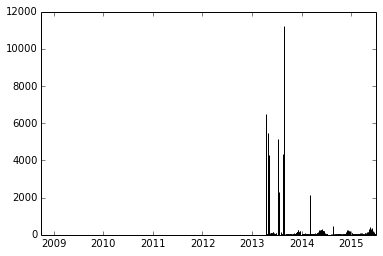

In [24]:
# Submissions by day
submissions_by_day_sorted = sorted(submissions_by_day, key=lambda x: x[0])
date, submissions = zip(*submissions_by_day_sorted)
plt.vlines(date, 0, submissions)

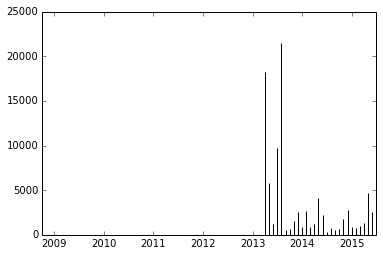

In [25]:
# Submissions by month
submissions_by_month_sorted = sorted(submissions_by_month, key=lambda x: x[0])
date, submissions = zip(*submissions_by_month_sorted)
plt.vlines(date, 0, submissions)

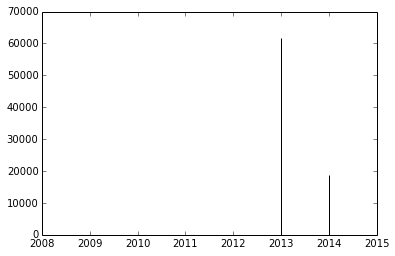

In [26]:
# Submissions by year
submissions_by_year_sorted = sorted(submissions_by_year, key=lambda x: x)
date, submissions = zip(*submissions_by_year_sorted)
plt.vlines(date, 0, submissions)

## Conclusions
- Date field (date uploaded) and year field (academic year issued) distribution do not match. Based on date field we have more than 70% of thesis uploaded in 2013. I guess we should use the year field to evaluate trends.
- There are more theses with no subjects (30,000) than with no keywords (11,000)
- After combining keywords and subjects there are still 513 theses with no topic listed
- Most important fields for analysis are:
    - organization, program (where)
    - topics (what)
    - year (when)
- The rest are considered thesis metadata

## TODO
- Decide what to do with organization and programme fields, either use codes from collections field ('com_10024_256') or names and build a mapping between both
- Set a clear schema for fields organization, program, topics and year and clean the data
- Save the cleaned data to a new file